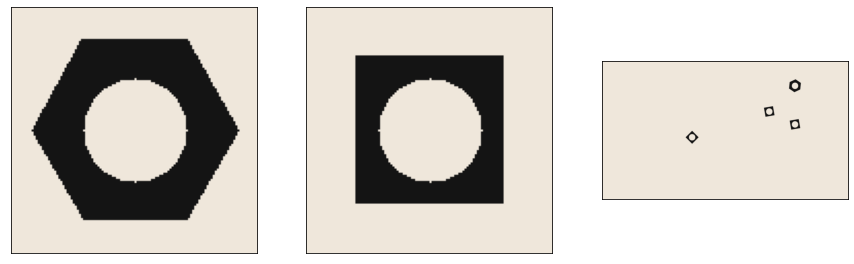

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

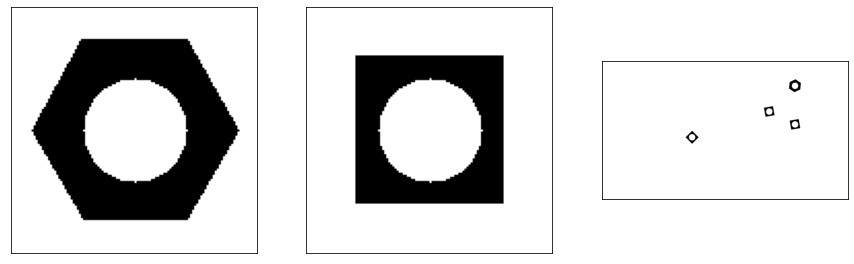

Threshold value of hexnut_template :  20.0
Threshold value of squarenut_template :  20.0
Threshold value of conveyor_f100 image :  20.0


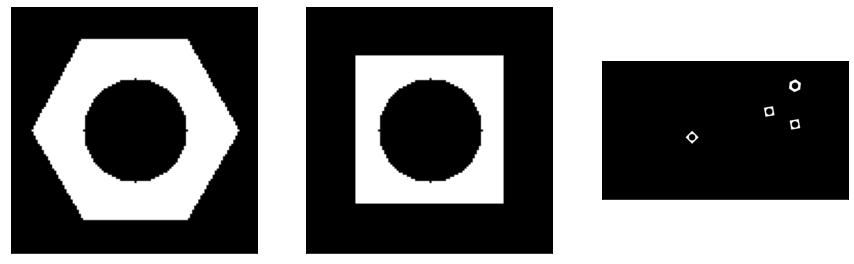

In [32]:
#grayscale images
hexnut_template_g = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template_g =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_g =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)
#hexnut_template_g=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
#squarenut_template_g=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
#conveyor_f100_g=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(hexnut_template_g,cmap='gray')
ax[1].imshow(squarenut_template_g,cmap='gray')
ax[2].imshow(conveyor_f100_g,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
print("Threshold value of hexnut_template : ",ret1)
print("Threshold value of squarenut_template : ",ret2)
print("Threshold value of conveyor_f100 image : ",ret3)
fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

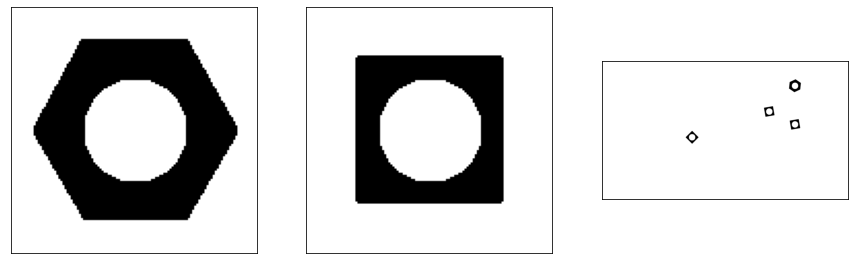

In [48]:
#grayscale images
hexnut_template=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding after gaussian filtering
blur_hexnut_template = cv.GaussianBlur(hexnut_template,(5,5),0)
blur_squarenut_template = cv.GaussianBlur(squarenut_template,(5,5),0)
blur_conveyor_f100 = cv.GaussianBlur(conveyor_f100,(5,5),0)

ret1,th1 = cv.threshold(blur_hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(blur_squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(blur_conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,'gray')
ax[1].imshow(th2,'gray')
ax[2].imshow(th3,'gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

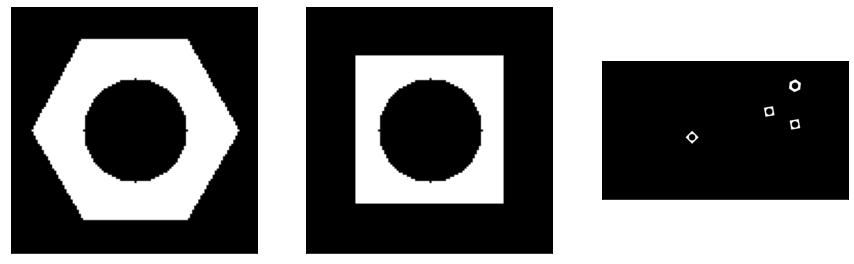

In [33]:
kernel = np.ones((3,3),np.uint8)
close1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
close2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
close3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig,ax=plt.subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [34]:
output1 = cv.connectedComponentsWithStats(close1)
output2 = cv.connectedComponentsWithStats(close2)
output3 = cv.connectedComponentsWithStats(close3)


# number of labels
num_labels = [output1[0],output2[0],output3[0]]
print("Number of connected components detected in the hexnut_template, squarenut_template and conveyor image : ",num_labels)
# label matrix
labels = [output1[1],output2[1],output3[1]]
# stat matrix
stats = [output1[2],output2[2],output3[2]]
print("Statistics of the hexnut_template, squarenut_template and conveyor image : ",stats)
# centroid matrix
centroids = [output1[3],output2[3],output3[3]]
print("Centroids of the hexnut_template, squarenut_template and conveyor image : ",centroids)

Number of connected components detected in the hexnut_template, squarenut_template and conveyor image :  [2, 2, 5]
Statistics of the hexnut_template, squarenut_template and conveyor image :  [array([[   0,    0,  120,  120, 9672],
       [  10,   16,  101,   88, 4728]], dtype=int32), array([[    0,     0,   120,   120, 11173],
       [   24,    24,    72,    72,  3227]], dtype=int32), array([[      0,       0,    1920,    1080, 2059646],
       [   1454,     150,      92,     100,    4636],
       [   1259,     359,      82,      82,    3087],
       [   1459,     459,      82,      82,    3087],
       [    650,     550,     101,     101,    3144]], dtype=int32)]
Centroids of the hexnut_template, squarenut_template and conveyor image :  [array([[59.33684864, 59.63513234],
       [59.83375635, 59.22356176]]), array([[59.5875772 , 59.5875772 ],
       [59.19677719, 59.19677719]]), array([[ 957.36323524,  540.44416273],
       [1499.24201898,  199.28515962],
       [1299.18302559,  399.1

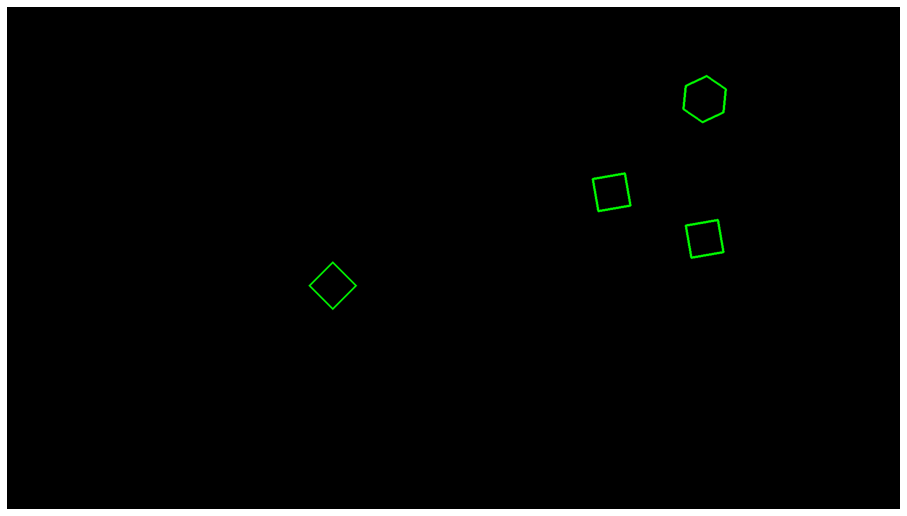

In [35]:
contours1, hierarchy1 = cv.findContours(close1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv.findContours(close2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv.findContours(close3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contours_c = np.zeros((conveyor_f100_g.shape[0],conveyor_f100_g.shape[1],3), np.uint8)
res = cv.drawContours(contours_c, contours3, -1, (0,255,0), 3).astype('uint8')

plt.figure(figsize=(16, 20))
plt.imshow(res)
plt.axis('off')
plt.show()

In [31]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [ ]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

In [37]:
grayscale_frames =[] # stores grayscale frames
cap = cv.VideoCapture('conveyor.mp4') # vedio location at root directory
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray=cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    grayscale_frames.append(gray)
    cv.imshow("Frame",frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()
print(len(grayscale_frames))

Can't receive frame (stream end?). Exiting ...
380


In [38]:
video = []
contours_list = []
contours_plots = []
for i,im in enumerate (grayscale_frames):
    retval, labels, stats, centroids = get_indexed_image(im) # Call get_indexed_image and extract retval, labels, stats, centroids.
    belt = ((labels >= 1)*255).astype('uint8') 
    contours,hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # Find contours of all nuts present in a given frame of the belt.
    count = 0 # number of nuts in each frame
    frame = [] # an array to append variables of cinnected components
    for contour in contours:
        metric = cv.matchShapes(contours_t[0], contour, cv.CONTOURS_MATCH_I1, 0.0)
        if metric <= 0.5: 
            count += 1
            M  = cv.moments(contour)
            ca = M['m00']
            cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00'])
            frame.append(np.array([cx, cy, ca, count])) # Coordinates of the centroid, Area and nut count
    contours_list.append(contours)
    video.append(frame)
    im_contours_belt = np.zeros((belt.shape[0],belt.shape[1],3), np.uint8) #Initiate a 3-D array with zeros to draw contours. 
    cont = cv.drawContours(im_contours_belt, contours, -1, (0,255,0), 5).astype('uint8') # Draw each contour
    contours_plots.append(cont)
    
    cv.putText(cont,'Frame No:%i'%(i),(1000,200),cv.FONT_HERSHEY_SIMPLEX, 2,(0,255,0),2,cv.LINE_AA)
    cv.imshow('contours',cont)
    if cv.waitKey(1) == ord('q'):  
        break
        
cap.release()
cv.destroyAllWindows()

NameError: name 'get_indexed_image' is not defined